## Factors Influencing HIT ##

#### Base US Simulation ####

To explore the various concepts of RKnot and viral spread, we'll use a simulation design based on [CDC Best Planning Scenario](https://www.cdc.gov/coronavirus/2019-ncov/hcp/planning-scenarios.html) guidelines for
virus characteristics including:

* $R_0$ 2.5
* IFR for each of 4 age groups

Other assumptions:

* Population of $10,000^1$
* Initial Infected of 2
* Duration of Infectiousness 14 days$^2$
* Duration of Immunity 365 days
* Density of ~1 subject per location (`dlevel='medium'`)

$^1$*proportionately split among the 4 age groups to match* [US census data](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf).

$^2$*equal likelihood of transmission on any day (i.e. no viral load curve)*

#### 1. Equal ####
The first simulation makes the most homogeneous assumptions. 

+ No group is restricted in terms of movement. 
+ All dots are able to interact with one another. 
+ All dots are susceptible at initiation.
+ All dots are equally likely to move to any dot on the grid (`mover='equal'`)

In [1]:
from IPython.display import YouTubeVideo
from rknot.sim import Sim
from rknot.animate import SimChart

In [2]:
group1 = dict(
    name='0-19',
    n=2700,
    n_inf=0,
    ifr=0.00003,
    mover='equal',
)
group2 = dict(
    name='20-49',
    n=4100,
    n_inf=1,
    ifr=0.0002,
    mover='equal',
)
group3 = dict(
    name='50-69',
    n=2300,
    n_inf=1,
    ifr=0.005,
    mover='equal',
)
group4 = dict(
    name='70+',
    n=900,
    n_inf=0,
    ifr=0.054,
    mover='equal',
)
groups = [group1, group2, group3, group4]
params = {'dlevel': 'med', 'Ro':2.5, 'days': 365, 'imndur': 365, 'infdur': 14}

In [3]:
sim = Sim(groups=groups, **params)
sim.run()

2020-10-05 08:36:32,570	INFO resource_spec.py:223 -- Starting Ray with 15.43 GiB memory available for workers and up to 7.74 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:36:33,016	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


Running the animation will result in a video as per below:

In [4]:
chart = SimChart(sim)
chart.animate.save()

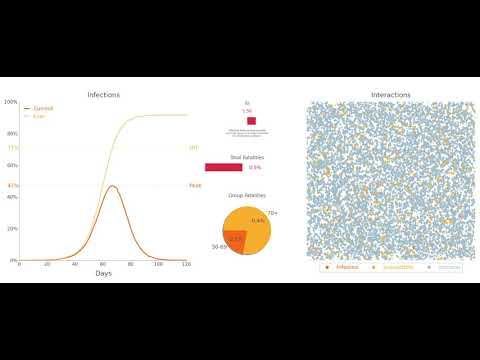

In [5]:
YouTubeVideo('rx7CYzivVe0', width=525*5/4, height=225*5/4)

*Note embedded videos are used for convenience purposes. Given the random processes involved, running the same code will produce slightly different results each time.

The sim results in a relatively standard spread curve with 

|         |            |
| ------------- |:-------------:|
| Peak      |   47% |
| HIT      | 71%      |
| Fatalities | 0.5%      |

HIT of 71%. You'll note this is somewhat higher than the expected HIT of 60% for $R_0$ 2.5, but not quite equal. The differences result given:

1. The simulation is a stochastic process and random variation will result in variation from the mathematical model in smaller populations.
2. This is not an entirely homogeneous population, with different IFRs and different numbers of contacts between subjects. In particular, because dots can occupy the same location at the same time, and multiple infected dots at the same location increase the transmission rate for any susceptible, this tends to lead to faster spread than $R_0$ would suggest.

#### 2. Local ####
In remaining simulations, we begin to introduce ever increasing homogeneity.

Our first change is change all of the subjects mover functions to `local`. The `local` mover has a strong bias towards locations only in its immediate vicinity, which is a better approximation of real world processes (though certainly not a perfect one).

In [6]:
group1['mover'] = 'local'
group2['mover'] = 'local'
group3['mover'] = 'local'
group4['mover'] = 'local'
groups = [group1, group2, group3, group4]

In [7]:
sim = Sim(groups=groups, **params)
sim.run()

chart = SimChart(sim)
chart.animate.save()

2020-10-05 08:36:37,151	INFO resource_spec.py:223 -- Starting Ray with 15.43 GiB memory available for workers and up to 7.72 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:36:37,521	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


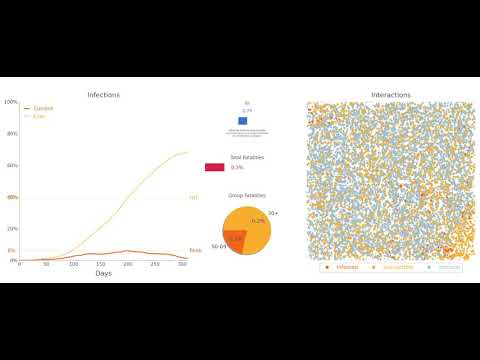

In [8]:
YouTubeVideo('vycjkdq4weE', width=525*5/4, height=225*5/4)

We can see from the animation above that by restricting movement, viral spread occurs in a much slower fashion with peak infection rate of just 6% and a HIT of 39%.

|         |            |
| ------------- |:-------------:|
| Peak      |   6% |
| HIT      | 39%      |
| Fatalities | 0.3%      |

*CAUTION: RKnot estimates transmission rate assuming all subjects are `equal` movers. Thus, where `local` movers are used, the transmission rate may be underestimated and result in the much lower transmission witnessed.*

#### 3. Social Millenials ####
In this simulation, we set `mover=social` for just the 20-49 age group. This is a rough approximation of that group's real-world propensity to travel more frequently (or go to more events).

In [9]:
group1['mover'] = 'local'
group2['mover'] = 'social'
group3['mover'] = 'local'
group4['mover'] = 'local'
groups = [group1, group2, group3, group4]

In [10]:
sim = Sim(groups=groups, **params)
sim.run()

chart = SimChart(sim)
chart.animate.save()

2020-10-05 08:36:41,110	INFO resource_spec.py:223 -- Starting Ray with 15.43 GiB memory available for workers and up to 7.73 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:36:41,483	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


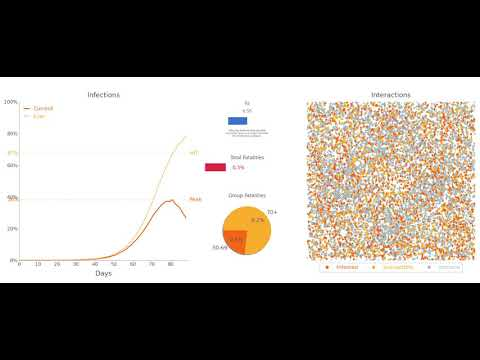

In [11]:
YouTubeVideo('tNTM3uC1I78', width=525*5/4, height=225*5/4)

This results in:

|         |            |
| ------------- |:-------------:|
| Peak      |   38% |
| HIT      | 67%      |
| Fatalities | 0.4%      |

We can see how powerful mixing is within a population. Even with the majority of subjects moving only locally, if a large enough population is moving broadly across the space, it will significantly increase the rate of spread.

#### 4. Pre-Existing Immunity ####
In this scenario, we adjust the susceptibility factor for just two groups by relatively small amounts as follows:

+ 20-49: 80%
+ 50-69: 65%

This means, in the inverse, that 10% and 25% of the subjects in the respective groups are already immune to the virus (whether through pre-existing T-cell immunity, anti-bodies, or otherwise).

The older group is assumed to have a lower susceptibility factor as it is more likely that older people will have had more exposure to similar viruses over their lifetime.

T-cell immunity to sars-cov-2 remains a controversial subject, but [many studies](https://www.bmj.com/content/370/bmj.m3563) have found T-cell prevalance in between 20% - 50% of in *people unexposed to sars-cov-2*. It is suggested that exposure to "common cold" coronaviruses (or more dangerous ones) may convey this immunity.

In [12]:
group2['susf'] = .8
group3['susf'] = .65
groups = [group1, group2, group3, group4]
sim = Sim(groups=groups, **params)
sim.run()

chart = SimChart(sim)
chart.animate.save()

2020-10-05 08:36:45,292	INFO resource_spec.py:223 -- Starting Ray with 15.43 GiB memory available for workers and up to 7.73 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:36:45,663	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


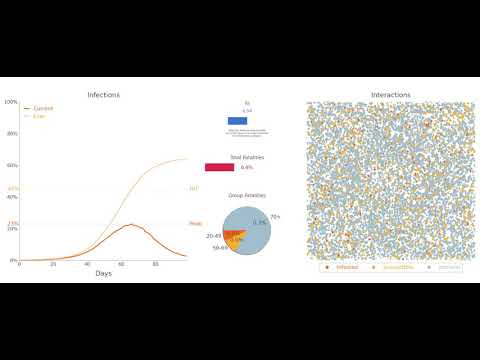

In [13]:
YouTubeVideo('Rqurf_UFqBM', width=525*5/4, height=225*5/4)

This results in:

|         |            |
| ------------- |:-------------:|
| Peak      |   23% |
| HIT      | 45%      |
| Fatalities | 0.4%      |

We can see that pre-existing immunity would significantly reduce HIT, but perhaps not impact the fatality rate. This is likely because, in this Sim, the elderly are assumed to *not* have pre-existing immunity.

#### 5. Events ####
Certainly, the vast majority of people in the US do not move in such pre-defined ways as set out by the `mover` function. In reality, people tend to move with a local bias with a small number of interactions, supplemented by larger movements to locations with a large number of interactions in a small amount of time.

In RKnot, we can simulate this with Event objects. And we will incorporate a number of them in this simulation. 

First, we will reset the susceptibility factors of all the groups to 1 and reset all `mover` functions to `local`.

In [14]:
group2['mover'] = 'local'
group2['susf'] = 1
group3['susf'] = 1
groups = [group1, group2, group3, group4]

Then we will instantiate a handful of events recurring periodically over the duration of the sim.

In [15]:
from rknot.events import Event

school1 = Event(name='school1', xy=[25,42], start_tick=2, groups=[0], capacity=10, recurring=2)
school2 = Event(name='school2', xy=[78,82], start_tick=3, groups=[0], capacity=10, recurring=2)
game = Event(name='game', xy=[50,84], start_tick=6, groups=[0,1,2], capacity=100, recurring=14)
concert1 = Event(name='concert1', xy=[10,10], start_tick=7, groups=[1], capacity=50, recurring=14)                 
concert2 = Event(name='concert2', xy=[91,92], start_tick=21, groups=[1], capacity=50, recurring=14)
bar = Event(name='bar', xy=[17,24], start_tick=4, groups=[1], capacity=5, recurring=7)
bar2 = Event(name='bar2', xy=[87,13], start_tick=5, groups=[1], capacity=5, recurring=7)
bar3 = Event(name='bar3', xy=[52,89], start_tick=6, groups=[1,2], capacity=5, recurring=7)
church = Event(name='church', xy=[2,91], start_tick=7, groups=[2,3], capacity=20, recurring=7)

events = [school1, school2, game, concert1, concert2, bar, bar2, bar3, church]

In [16]:
sim = Sim(groups=groups, events=events, **params)
sim.run()
chart = SimChart(sim)
chart.animate.save()

2020-10-05 08:36:49,680	INFO resource_spec.py:223 -- Starting Ray with 15.43 GiB memory available for workers and up to 7.72 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:36:50,060	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


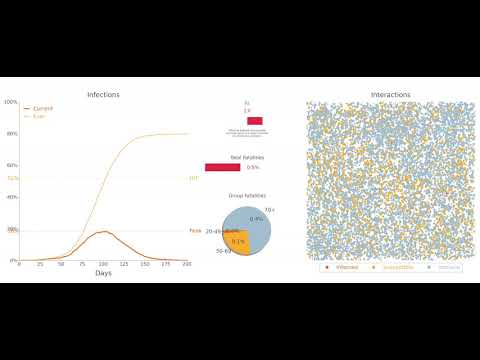

In [17]:
YouTubeVideo('r4Bre3aV0QA', width=525*5/4, height=225*5/4)

This results in:

|         |            |
| ------------- |:-------------:|
| Peak      |   18% |
| HIT      | 52%      |
| Fatalities | 0.5%      |

We can see that this sort of event-based structure resulted in lower peak infections and HIT relative to Example 3. The curve is flatter and longer. 

The selection of events here is relatively arbitrary and perhaps not perfectly illustrative of the nature of movement but it does highlight how more heterogeneous movement might lead to lower HIT.

#### 6. Gates ####
We can further improve the real world interactions by introducing gates. Subjects are not always freely able to interact with all other people in a population. Often their movement is restricted to within certain areas. Furthermore, other people's access into those areas is restricted.

Elderly people living in retirement homes or assisted living centers is an example. To simulate this, we will split `group4` into two separate groups. The first group will be ~1/3rd the size and will be able to move freely throughout the whole grid as previously. The second group will be 2/3rds the size and will have its movement restricted to a box. The box will also function as a gate, meaning other dots cannot enter the area (unless transported inside via a Travel event).

In addition, we will update certain events to account for the additional group including adding an event specifically for the new group.

In [18]:
group4a = dict(
    name='70+',
    n=300,
    n_inf=0,
    ifr=0.054,
    mover='local',
)
group4b = dict(
    name='70+G',
    n=600,
    n_inf=0,
    ifr=0.054,
    mover='local',
    box=[1,10,1,10],
    box_is_gated=True,
)
groups = [group1, group2, group3, group4a, group4b]

In [19]:
game = Event(name='game', xy=[50,84], start_tick=6, groups=[0,1,2,3], capacity=100, recurring=14)
church = Event(name='church', xy=[2,91], start_tick=7, groups=[2,3], capacity=20, recurring=7)
church2 = Event(name='church', xy=[2,3], start_tick=7, groups=[4], capacity=5, recurring=7)
events = [game, concert1, concert2, bar, bar2, bar3, church, church2]

Now, such elderly populations are not totally sealed of from the rest of the world. In fact, they are often visited by family members or friends. We can mimick this with the use of a Travel object.

In this sim, at least one person will enter into the `group4b` gate for a day only. And this will repeat every day of the sim.

In [20]:
from rknot.events import Travel
visit = Travel(name='visit', xy=[1,1], start_tick=3, groups=[1,2], capacity=1, duration=1, recurring=1)
events.append(visit)

In [21]:
sim = Sim(groups=groups, events=events, **params)
sim.run()
chart = SimChart(sim)
chart.animate.save()

2020-10-05 08:36:53,735	INFO resource_spec.py:223 -- Starting Ray with 15.43 GiB memory available for workers and up to 7.72 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:36:54,107	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


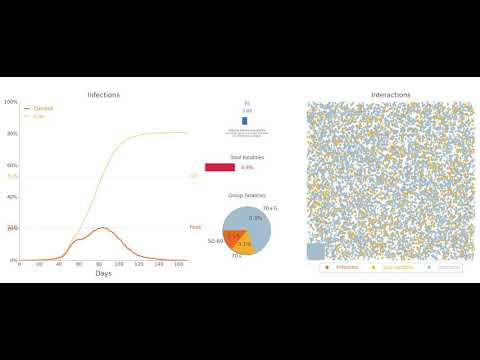

In [22]:
YouTubeVideo('I-qscNhXx00', width=525*5/4, height=225*5/4)

This results in:

|         |            |
| ------------- |:-------------:|
| Peak      |   21% |
| HIT      | 53%      |
| Fatalities | 0.4%      |

This gated structure results in essentially no impact. The use for theis structure will become more evident in the disucssion on [Policy Decisions.](#)

#### 7. Event, Gates, and Pre-Immunity ####
Now we can see how pre-immunity might impact viral spread in a population with more homogeneous interactions.

We will also split `group2` into two separate groups with different movers (`group2a` and `group2b`. The 20-49 age group is a large cohort and not all members will move in the same way. Some will move socially, other more locally.

Then, we update the group list and update our events for the new group structure.

In [23]:
group2['susf'] = .8
group3['susf'] = .65
groups = [group1, group2, group3, group4a, group4b]

In [24]:
game = Event(name='game', xy=[50,84], start_tick=6, groups=[0,1,2], capacity=100, recurring=14)
concert1 = Event(name='concert1', xy=[10,10], start_tick=7, groups=[1], capacity=50, recurring=14)                 
concert2 = Event(name='concert2', xy=[91,92], start_tick=21, groups=[1], capacity=50, recurring=14)
bar = Event(name='bar', xy=[17,24], start_tick=4, groups=[1], capacity=5, recurring=7)
bar2 = Event(name='bar2', xy=[87,13], start_tick=5, groups=[1], capacity=5, recurring=7)
bar3 = Event(name='bar3', xy=[52,89], start_tick=6, groups=[1,2], capacity=5, recurring=7)
church = Event(name='church', xy=[2,91], start_tick=7, groups=[2,3], capacity=20, recurring=7)
church2 = Event(name='church', xy=[2,3], start_tick=7, groups=[4], capacity=5, recurring=7)

visit = Travel(name='visit', xy=[1,1], start_tick=3, groups=[1,2], capacity=1, duration=1, recurring=1)

events = [
    school1, school2,
    game, concert1, concert2, bar, bar2, bar3, 
    church, church2, visit,
]

In [25]:
sim = Sim(groups=groups, events=events, **params)
sim.run()
chart = SimChart(sim)
chart.animate.save()

2020-10-05 08:36:58,183	INFO resource_spec.py:223 -- Starting Ray with 15.43 GiB memory available for workers and up to 7.72 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:36:58,558	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


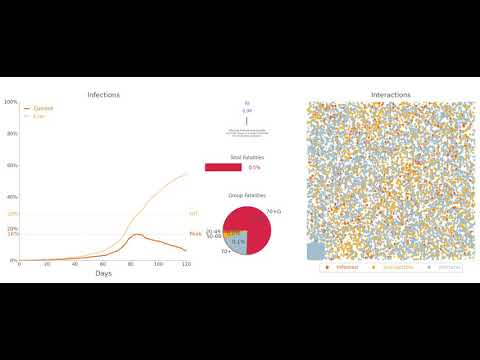

In [26]:
YouTubeVideo('UcrmDgDwn_w', width=525*5/4, height=225*5/4)

This results in:

|         |            |
| ------------- |:-------------:|
| Peak      |   16% |
| HIT      | 29%      |
| Fatalities | 0.5%      |

So once again we see that pre-existing immunity would have the effect of significanlty reducing peak infections and HIT, however, fatalities remain about the same. Also note the longer tail that results compared to Example 4 (the flatter the curve, the longer the tail).

#### 8. Self Aware Social Distancing ####
In a self-aware population, we can also incorporate an assumption that certain members of the population will implement social distancing practices (even in the absence of prescribed government policy). For example, individuals might wear masks or face shields while in public. 

This is implemented via a SocialDistancing object, which reduces the transmission factor of the subjects in the applicable group.

In [27]:
from rknot.events import SocialDistancing as SD
sd = SD(name='6-feet', tmfs=[.975,.95,.75,.5], groups=[1,2,3,4], start_tick=5, duration=90)

events.append(sd)

In [28]:
sim = Sim(groups=groups, events=events, **params)
sim.run()
chart = SimChart(sim)
chart.animate.save()

2020-10-05 08:37:02,355	INFO resource_spec.py:223 -- Starting Ray with 15.38 GiB memory available for workers and up to 7.71 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-10-05 08:37:02,726	INFO services.py:1191 -- View the Ray dashboard at localhost:8265


---------------------------------------------------------------------------------
|                                  SIM DETAILS                                  |
|-------------------------------------------------------------------------------|
|           boundary|  [  1 100   1 100]|             n_locs|              10000|
|-------------------|-------------------|-------------------|-------------------|
|                  n|              10000|            density|                1.0|
|-------------------|-------------------|-------------------|-------------------|
|                ktr|                1.0|                tmr|               0.18|
|-------------------|-------------------|-------------------|-------------------|


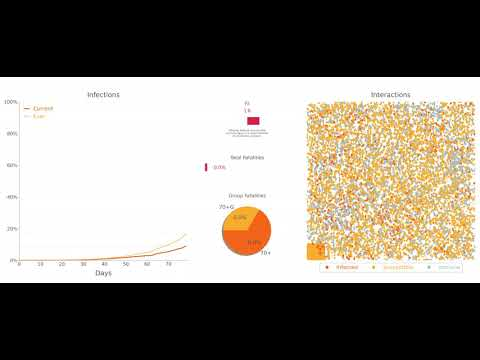

In [29]:
YouTubeVideo('V5_aKGftfFs', width=525*5/4, height=225*5/4)

This results in:

|         |            |
| ------------- |:-------------:|
| Peak      |   15% |
| HIT      | 35%      |
| Fatalities | 0.5%      |

We see here that a moderate degree of social distancing in a population does not impact peak infection or HIT materially (at least not when HIT is already much lower than $R_0$ would suggest).

#### 9. Isolation ####
TBD

#### 10. Infectiousness Curve ####
TBD